In [59]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split # typically done at the start

from sklearn.feature_selection import SelectPercentile, f_classif

import matplotlib as mpl
import matplotlib.pyplot as plt


In [23]:
full_df = pd.read_csv('./Parking_Violations_Issued_-_Fiscal_Year_2018.csv', usecols=  ['Summons Number','Plate Type', 
        'Violation Code', 'Vehicle Body Type', 'Vehicle Make', 'Vehicle Color', 'Violation County','Vehicle Year', 'Violation Time'], 
         index_col='Summons Number')

C:\Users\snalegave\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [32]:
full_df.shape


(11721626, 8)

In [37]:
# full_df.drop(columns=['Registration State', 'Issue Date' ,'Law Section','Sub Division', 'Vehicle Year'])
sample_df = full_df.sample(n=150000)

def initialClean(df):
    df = df.dropna(how = 'any')
    df = df.drop_duplicates()
#     Convert violation code from int to string
    df['Violation Code'] = df['Violation Code'].astype(str)

    
#     Correct plate type and registration site for vehicle
    plate_types = 'AGR MCD AMB MCL ARG MED ATD MOT ATV NLM AYG NYA BOB NYC BOT NYS CBS OMF CCK OML CHC OMO CLG OMR CMB OMS CME OMT CMH OMV COM ORC CSP ORG DLR PAS EDU PHS FAR PPH FPW PSD GAC RGC GFC RGL GSC SCL GSM SNO HAC Ham SOS HAM HIF SPO HIR SRF HIS SRN HOU STA HSM STG IRP SUP ITP TOW JCA TRA JCL THC JSC TRC JWV TRL LMA USC LMB USS LMC VAS LOC VPL LTR WUG LUA'.split(' ')
    df = df[df['Plate Type'].isin(plate_types)]

#     reg_state = 'AL MT AK NE AZ NV AR NH CA NJ CO NM CT NY DE NC FL ND GA OH HI OK ID OR IL PA IN RI IA SC KS SD KY TN LA TX ME UT MD VT MA VA MI WA MN WV MS WI MO WY AB ON BC PE FO QB MB SK MX GV NB DP NF DC NT YT NS'.split(' ')
#     df = df[df['Registration State'].isin(reg_state)]

#     Correct make and year of vehicle
    df = clean_make_year(df)
    
#     Removing Vehicle Body Types which do not follow city codes
    bodyTypes = ['FIRE', 'CONV', 'SEDN', 'SUBN', '4DSD', '2DSD', 'H/WH', 'ATV', 'MCY', 'H/IN', 'LOCO', 'CUST', 'RPLC', 'AMBU', 'P/SH', 'RBM', 'R/RD', 'RD/S', 'S/SP', 'SN/P', 'TRAV', 'MOBL', 'TR/E', 'T/CR', 'TR/C', 'SWT', 'W/DR', 'W/SR', 'FPM', 'MCC', 'EMVR', 'TRAC', 'DELV', 'DUMP', 'FLAT', 'PICK', 'STAK', 'TANK', 'REFG', 'TOW', 'VAN', 'UTIL', 'POLE', 'BOAT', 'H/TR', 'SEMI', 'TRLR', 'LTRL', 'LSVT', 'BUS', 'LIM', 'HRSE', 'TAXI', 'DCOM', 'CMIX', 'MOPD', 'MFH', 'SNOW', 'LSV']
    df = df[df['Vehicle Body Type'].isin(bodyTypes)]

#     Removing Sub Divisions which don't follow city codes
#     subDivisions = ['A0','A1','A2','A3','A4','A5','A6','A7','A8','A9','B1','B2','B3','B9','C0','C1','C2','C3','C4','C5','C6','C7','C8','C9','CM','D0','D1','D2','D3','D4','D5','D6','D7','D8','D9','E1','E2','E3','E4','E7','E9','F1','F2','F4','F5','F8','F9','G0','G1','G2','G3','G4','G5','G6','G7','G8','G9','GU','HB','HH','HR','HS','H1','H2','H3','H4','H5','H6','H7','H8','H9','I1','I2','I3','I4','I5','I6','I7','I8','I9','J1','J2','J3','J4','J5','J6','J7','J8','J9','K1','K2','K3','K4','K5','K6','K7','K8','K9','L1','L2','L3','L8','L9','M1','M2','M3','M4','M9','N1','N2','N3','N4','N9','O1','O2','O3','O4','O5','O6','O7','O8','O9','P1','P2','P3','P4','P5','P6','P7','P8','P9','Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','RA','RB','RG','RH','RK','RP','RR','RS','RT','RW','R0','R1','R2','R3','R4','R5','R6','R7','R8','R9','S0','S1','S2','S3','S4','S5','S9','T1','T2','T9','U0','U1','U2','U3','U4','U5','U6','U7','U8','U9','V0','V1','V2','V3','V4','V5','V6','V7','V8','V9','W1','W2','W3','W4','W5','W6','W7','W8','W9','Y1','Y2','Y3','Y4','Y5','Y6','Y7','Y8','Y9','Z0','Z1','Z2','Z3','Z4','Z5','Z6','Z7','Z8','Z9']
#     df = df[df['Sub Division'].isin(subDivisions)]

#     Correct color
    col_rem = ['PRW','MH','TPE','FT','TAUPE','GRU','XXX','WHBR','AZ','PL','GM','LGITH','BLPR','BK SL','RDBR','LEXUS','RDPR','BRK','MAXIM','BRT','GRBK','GU','BT','BL/SI','ZIWIY','WT BK','BN.','LTBK', 'PRBL','BLTN','VAN','BLT','BRG','GY TN','BLYW','BLBR','GY/BL','DODGE','MAZ','BWTH','IW','NMI','NOCLR','OTH','WYBLU','BKPR','GKN','WAJP','GYG','BRY','KX','VN  R','DKTN','RDTN','TQ','PLE','ORBK','GLGR','YAN','QGY','MITI','BL/WH','QUEEN','GRT','BLK/S','ORWH','BLE','MULT','ZJHT','BWR','BBRW','GRG','TN.','DARL','GYMR','GRGL','CNH', 'SC','GLBK', 'VN  S', 'COM''WT BL','LTPR','BLGL','GRAT','WORKH','GRBL','CRM','MUILT','K.','VLK','GA','RD BK','GYRD','ZKCXN','YE/OR','RDWH','GLK','GT','MC','BLR','KD','GRTN''WHOR','BM','WJT','BK/GR','DI', 'BKT', 'SIM','RDGR', 'RDT', 'WH BL','BE','RUST','WHBK','RY','UJ','GYGL','NH','WH/BL','RDBK','TL', 'BKRD','SR','BRU','BUS','GYQ','MUL','DECAL','BLBK','RDG','BON','LTBR','LTTN','TNGY','TNBL','GRGY','B L','BLWH','BK BL','TNG','RDGY','HRAU','CHAMP','BLKQ','BJ','WB','GYTN','BKBL','BLKL','WHRD','BRGR','BKG','BGE','-','TNRD','GRW','NOCL','W/B','GLBL','BRTOW','NO','RDBL',', ,U','BRZ','UNKNO','BLW','BLGR','GYBL','BLRD','WN','WHGR','GYGR','RDMR','BLB','WHG','GYBK','WHO','BKGR','TNR','OR BK','BLG','NOC','BKTN','MULTI','GYGY','RDW','WT/BL','BLGY','GYB','GYBR','UNK','BKGY', 'DK/', 'TN', 'PR', 'ALUMI', 'OTHER', 'LT/', 'WHB', 'WHBL', 'WHGY', 'TAN', 'LTT']
    df = df[~df['Vehicle Color'].isin(col_rem)]

    black = ['BKBK','BLBL','BLLK','B K','BLACJ','BLKI','BL AC','BLC','CHAR','BLACL','BKL','BLIC','B LK','BLK.','VLACK','B LAC''BIACK','BLCK','BLACC','Black','BLAVK','BIK','BK,','BL/','BLA','BLAC','BK/','BKACK','BLAKC','BK', 'BLACK', 'BLK']
    white = ['WITE','WHOTE','WHICH','WIT','CREAM','WHLE','WHWH','WHIYE','ITE',"WH'",'WHITW','WJOTE','WHTN','WHITR','WHT/S','WHTE','WT.','PEARL','WTE','W','WH.','WHIT', 'WHITE', 'WH', 'WT', 'WH/', 'WHT', 'WHI']
    silver = ['SIV','Silve','SIL.','SVR','SI','SLIVE','SIVL','SILO','SLVER','SILGV','SILVQ','SV','SIVLE','SILER','SLR','SL.','SILVE', 'SIL', 'SL', 'SILV', 'SILVR']
    green = ['GRGR','Green','DK GN','GR.','LGR','LT/GR','DK GR','GN.','DKGR','G','GRE','GREEB','LTGR','GN','GREEN', 'GR', 'GRN', 'GREN', 'GREE']
    grey = ['GEAY','GEY','GARY','DGRAY','GRRAY','GREY.','GHRAY','GRY.','GR/','GRAY.','GRA','HREY','GAEY','GY/','Gray','GY', 'GREY', 'GRAY', 'GRY', 'LTGY', 'LTG', 'DKGY', 'DKG', 'GY.']
    red = ['RR','RED.','RD.','RD/','R','DKRD','RD', 'RED', 'DKR']
    maroon = ['MROO','MRN','MN','DKMR','DKM','MAROO','MAR', 'MR', 'MARO']
    gold = ['GDL','GNY','GLOD','GD.','LTGL','GLTN','GOLD.','GL.','GD','GOLD', 'GL', 'GLD']
    blue = ['TEAL','BLUEW','BLIE','NAVY','B LUE','BL UE','BLUE.','BLUED','LBL','BI','NAVY.','DBL','LBUE','LB','LTBL','DKB','B','LTB', 'BL.', 'DKBL', 'BL', 'BLUE', 'BLU']
    brown = ['BRBR','BROWY','BROK','BRONK','BRZ', 'BRONZ','COPPE','DKBR','BWN','BRW','BROW','BRO','BROWN', 'BR', 'BRN', 'BRWN', 'BW']
    orange = ['O','ORAGE','OG','ORANE','DKOR','ORNGE','ORAG','ORA','OR.','0','ORN','ORAN','ONG','ORANG', 'OR', 'ORG']
    yellow = ['YELO','YLL','YEDLL','LTYW','YELW','YLW','YELLW','YL','YEL','YELL','Y','YELLO', 'YW']
    purple = ['LAVEN','DKPR','PUPLE','TNGL','TURPL','PURP','PURPL', 'PUR']
    pink = ['LTPK','DKPK','LTP','PINK']
    burgundy = ['BY','BUR','BURGY','BARG','BURGE','BERG','BU','BGDY','BURGA','BRGY','BN','BURGU', 'BURG']
    beige = ['BEGE','BGE.','BIGE','BAGE','BEIG','BEIGE', 'BEIEG', 'BIEGE', 'BG']
    
    color = ''
    
    for index, row in df.iterrows():
        if row['Vehicle Color'] in black:
            color = 'black'
        elif row['Vehicle Color'] in white:
            color = 'white'
        elif row['Vehicle Color'] in silver:
            color = 'silver'
        elif row['Vehicle Color'] in green:
            color = 'green'
        elif row['Vehicle Color'] in grey:
            color = 'grey'
        elif row['Vehicle Color'] in red:
            color = 'red'
        elif row['Vehicle Color'] in maroon:
            color = 'maroon'
        elif row['Vehicle Color'] in gold:
            color = 'gold'
        elif row['Vehicle Color'] in blue:
            color = 'blue'
        elif row['Vehicle Color'] in brown:
            color = 'brown'
        elif row['Vehicle Color'] in orange:
            color = 'orange'
        elif row['Vehicle Color'] in yellow:
            color = 'yellow'
        elif row['Vehicle Color'] in purple:
            color = 'purple'
        elif row['Vehicle Color'] in pink:
            color = 'pink'
        elif row['Vehicle Color'] in burgundy:
            color = 'burgundy'
        elif row['Vehicle Color'] in beige:
            color = 'beige'
        df.at[index,'Vehicle Color'] = color

    man_cty =['NY', 'MN']
    bronx_cty = ['BX']
    brooklyn_cty = ['BK','K']
    queens_cty = [ 'Q', 'QN', 'QUEEN', 'QNS']
    st_isl_cty = ['ST', 'R']
    
    remove_cty = ['PBX', 'USA']
    df = df[~df['Violation County'].isin(remove_cty)]
    
    for index, row in df.iterrows():
        if row['Violation County'] in man_cty:
            cty = 'man_cty'
        elif row['Violation County'] in bronx_cty:
            cty = 'bronx_cty'
        elif row['Violation County'] in brooklyn_cty:
            cty = 'brooklyn_cty'
        elif row['Violation County'] in queens_cty:
            cty = 'queens_cty'
        elif row['Violation County'] in st_isl_cty:
            cty = 'st_isl_cty'
        df.at[index,'Violation County'] = cty


    
#     Adding Month and Year of the violation
#     months = []
#     years = []
#     for k in df["Issue Date"]:
#         months.append(int(k[3:5]))
#         years.append(int(k[6:]))
#     df["Month"] = months
#     df['Year'] = years

    df.drop(columns=['Vehicle Make'],inplace=True)
    return df

def clean_make_year(clean):
    # remove white space
    clean['Vehicle_Make'] = clean['Vehicle Make'].str.strip()
    
    # remove any car with less than 10 recordings
    clean = clean[clean.groupby('Vehicle_Make').Vehicle_Make.transform(len) > 10]
    
    # fix R&R
    clean['Vehicle_Make'] = clean['Vehicle_Make'].replace('R/R', 'ROLLS')
    
    # fix L/R
    clean['Vehicle_Make'] = clean['Vehicle_Make'].replace('L/R', 'ROVER')
    
    # remove unrelated
    removable = ['FRHT', 'FEDEX', 'WHITE', 'UTILI', 'BL/BI', 'NEW', 'HIGHW', 'TRUCK', 'UPS']
    clean = clean[~clean['Vehicle_Make'].isin(removable)]
    
    clean = clean[(clean['Vehicle Year'] > 1910) & (clean['Vehicle Year'] < 2020)]

    return clean

def convert_to_datetime(x):
    mid = int(len(x) / 2)
    hrs = int(x[0:mid])
    if (x[len(x) - 1] == 'P' or x[len(x) - 1] == 'A'):
        is_pm = x[len(x) - 1] == 'P'
    else:
        mins = int(x[mid:len(x)])
        is_pm = False
    if (is_pm):
        hrs = hrs + 12
    return hrs

sample_df = initialClean(sample_df)
sample_df['Violation Time'] = sample_df['Violation Time'].dropna().apply(lambda x: convert_to_datetime(x))

def get_col_dummies(df):
    for column in list(df):
        if column != 'Violation Code':
            one_hot = pd.get_dummies(df[column])
            one_hot.columns = [column+'_' + str(c) for c in one_hot.columns]
            df.drop(columns=[column],inplace=True)
            df = df.join(one_hot)
    return df
sample_df = get_col_dummies(sample_df)

# Remove colums with less than 30 'true' cases since they will have a low variance
for col in sample_df.columns:
    if (sample_df[col].value_counts()[1] < 10):
        sample_df.drop(columns=[col], inplace=True)

print(sample_df.shape)
sample_df.head()


C:\Users\snalegave\Anaconda3\lib\site-packages\ipykernel_launcher.py:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\snalegave\Anaconda3\lib\site-packages\ipykernel_launcher.py:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(106160, 186)


,Violation Code,Plate Type_COM,Plate Type_HIS,Plate Type_IRP,Plate Type_ITP,Plate Type_MED,Plate Type_MOT,Plate Type_OML,Plate Type_OMR,Plate Type_OMS,...,Vehicle_Make_TESLA,Vehicle_Make_THOMA,Vehicle_Make_TOYOT,Vehicle_Make_UD,Vehicle_Make_VANHO,Vehicle_Make_VOLKS,Vehicle_Make_VOLVO,Vehicle_Make_VPG,Vehicle_Make_WORKH,Vehicle_Make_YAMAH
Summons Number,,,,,,,,,,,,,,,,,,,,,
8618104668,69,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8664312280,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8505394434,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8619230426,42,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8556420813,37,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [50]:
sample_df.shape

(106160, 186)

In [40]:
train_features, test_features, train_outcome, test_outcome = train_test_split(
   sample_df.drop(columns=['Violation Code']),      # features
   sample_df['Violation Code'],    # outcome
   test_size=0.30 # percentage of data to use as the test set
)


In [39]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(train_features, train_outcome)

train_pred = tree_clf.predict(test_features)
accuracy = accuracy_score(tree_clf.predict(test_features), test_outcome)
accuracy

0.16834265602413426

In [51]:
x_train, x_test, y_train, y_test = train_test_split(sample_df.drop(columns=['Violation Code']),
   sample_df['Violation Code'], test_size=0.25)


In [52]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)


In [57]:
accuracy = accuracy_score(dt.predict(x_test), y_test)
accuracy


0.1616804822908817

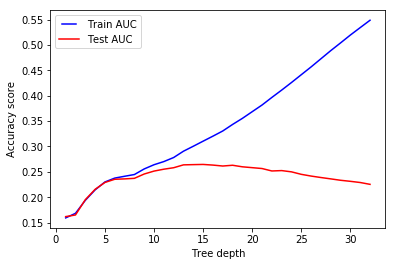

In [60]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(x_train, y_train)
    train_pred = dt.predict(x_train)
    accuracy = accuracy_score(train_pred, y_train)
    # Add auc score to previous train results
    train_results.append(accuracy)
    y_pred = dt.predict(x_test)
    accuracy = accuracy_score(y_pred, y_test)
    # Add auc score to previous test results
    test_results.append(accuracy)
    
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Tree depth')
plt.show()


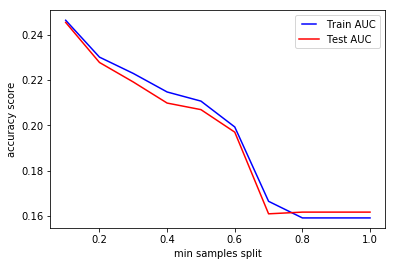

In [71]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
    dt.fit(x_train, y_train)
    train_pred = dt.predict(x_train)
    accuracy = accuracy_score(train_pred, y_train)

    train_results.append(accuracy)
    y_pred = dt.predict(x_test)
    accuracy = accuracy_score(y_pred, y_test)

    test_results.append(accuracy)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('accuracy score')
plt.xlabel('min samples split')
plt.show()


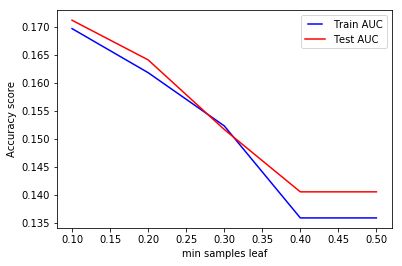

In [72]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    dt.fit(x_train, y_train)
    train_pred = dt.predict(x_train)
    accuracy = accuracy_score(train_pred, y_train)
    train_results.append(accuracy)
    y_pred = dt.predict(x_test)
    accuracy = accuracy_score(y_pred, y_test)
    test_results.append(accuracy)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('min samples leaf')
plt.show()


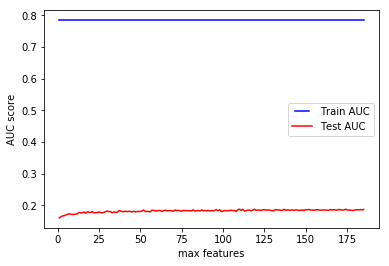

In [75]:
max_features = list(range(1,sample_df.shape[1]))
train_results = []
test_results = []

for max_feature in max_features:
    dt = DecisionTreeClassifier(max_features=max_feature)
    dt.fit(x_train, y_train)
    train_pred = dt.predict(x_train)
    accuracy = accuracy_score(train_pred, y_train)
    train_results.append(accuracy)
    y_pred = dt.predict(x_test)
    accuracy = accuracy_score(y_pred, y_test)
    test_results.append(accuracy)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()


In [7]:
sample_df.shape

(31035, 205)

In [8]:
stop
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

NameError: name 'stop' is not defined

In [ ]:
stop
pipe = make_pipeline(KNeighborsClassifier())

param_grid = {'kneighborsclassifier__n_neighbors': range(1,5), 'kneighborsclassifier__weights':["uniform", "distance"]}
grid = GridSearchCV(pipe, param_grid)
grid.fit(train_features, train_outcome)
grid.score(test_features, test_outcome)